In [1]:
import requests
import numpy as np
import pandas as pd
from astropy import units as u
from astropy import constants as c
import Planet_tools as pt


In [51]:
#select database to use

database = input("choose database: 1 for NASAExoplanetArchive, 2 for Exoplanet.eu >> ")

choose database: 1 for NASAExoplanetArchive, 2 for Exoplanet.eu >> 2


In [52]:
database

'2'

In [53]:
if database == "1":
    catalog = "NASAExoplanetArchive"

    default_query = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets&select=pl_name,pl_orbper,st_rad,st_mass,pl_orbincl,pl_radj,pl_bmassj&order=pl_orbper&where=st_mass>0 and pl_bmassj>0&format=csv"
    #,pl_dens,pl_imppar,pl_ratdor,pl_ratror,pl_massj,pl_orbsmax,st_logg,st_teff,,st_optmag
    #default_query = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets&getDefaultColumns&format=csv"
    all_planets =  requests.get(default_query)  
    all_planets = all_planets.text.replace(' ','').split('\n')
    planets_df = pd.DataFrame(columns=all_planets[0].split(','), 
                             data = [i.split(',') for i in all_planets[1:-1]])
    planets_df = planets_df.replace(to_replace='', value=np.nan)

    # convert to float when possible
    for i in planets_df.columns:
        planets_df[i] = planets_df[i].astype(float,errors='ignore')
        
    

elif database == "2":
    catalog = "Exoplanet.eu"

    exo_eu = pd.read_csv("http://exoplanet.eu/catalog/csv",
                     usecols=["# name",'orbital_period','star_radius','star_mass','inclination','radius','mass'])
    exo_eu = exo_eu.rename(columns={"# name": "pl_name",
                                "orbital_period":"pl_orbper",
                                "star_radius": "st_rad",
                                "star_mass": "st_mass",
                                "inclination": "pl_orbincl",
                                "radius": "pl_radj",
                                "mass": "pl_bmassj"})
    order = ['pl_name', 'pl_orbper', 'st_rad', 'st_mass', 'pl_orbincl', 'pl_radj', 'pl_bmassj']
    
    planets_df=exo_eu[order]
    planets_df=planets_df.assign( pl_name = planets_df["pl_name"].replace(to_replace=' ', value='', regex=True))


#catalog
print(f"Data from {catalog}")
planets_df

Data from Exoplanet.eu


,pl_name,pl_orbper,st_rad,st_mass,pl_orbincl,pl_radj,pl_bmassj
0,11Comb,326.03000,19.000,2.7000,NaN,NaN,NaN
1,11Ophb,730000.00000,NaN,0.0162,NaN,NaN,21.00000
2,11UMib,516.22000,24.080,1.8000,NaN,NaN,NaN
3,14Andb,185.84000,11.000,2.2000,NaN,NaN,NaN
4,14Herb,1773.40000,0.708,0.9000,NaN,NaN,NaN
5,16CygBb,799.50000,0.980,1.0100,NaN,NaN,NaN
6,17Scob,578.38000,25.920,1.2200,NaN,NaN,NaN
7,18Delb,993.30000,8.500,2.3000,NaN,NaN,NaN
8,1I/'Oumuamua,NaN,1.000,1.0000,NaN,0.000002,NaN
9,1RXS1609b,NaN,1.350,0.7300,NaN,1.700000,14.00000


In [64]:
pls = planets_df.loc[(planets_df["pl_bmassj"]>0) & (planets_df["pl_radj"]>0.5) & (planets_df["pl_orbper"]>0) &
                    (planets_df["pl_orbincl"]>0.)]

w103_ind = pls.index[pls["pl_name"] == "WASP-103b"].tolist()
print(w103_ind)
#update parameters of w103 to values from southworth&evans 2016
pls.at[w103_ind, ["st_rad","st_mass","pl_orbincl","pl_radj","pl_bmassj"]] = 1.413, 1.205, 88.2, 1.646, 1.47


###create new columns

#radius ratio and mass ratio
pls = pls.assign(Rp_Rs = (pls["pl_radj"]*c.R_jup.value/(pls["st_rad"]*c.R_sun.value)),
                 Mp_Ms = (pls["pl_bmassj"]*c.M_jup.value/(pls["st_mass"]*c.M_sun.value)))

#roche radius and semi-major-axis in units of stellar radius
pls = pls.assign( Rr=2.46*((1/pls["Mp_Ms"])**(1/3.))*pls["Rp_Rs"],
                 aR = pt.convert_param.P_to_aR(pls["pl_orbper"], pls["st_rad"], pls["st_mass"])) 

#distance to star in roche units
pls = pls.assign(R0 = pls["aR"]/pls["Rr"])   

#asymmetry parameter between axis of triaxial ellipsoid assuming hf=1.5
hf=1.5
pls = pls.assign(q = hf*0.5/pls["Mp_Ms"]*(pls["Rp_Rs"]/pls["aR"])**3)
pls = pls.assign(rank = pls["q"]*np.sin(np.deg2rad(pls["pl_orbincl"]))**3)

#select planets with the  largest asymmetry q (most deformed) and sort
def_pls = pls.loc[(pls["q"]>0.02)]
def_pls = def_pls.sort_values(by="q", ascending=False)

def_pls



[4116]


/home/tunde/miniconda3/envs/python3_env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,pl_name,pl_orbper,st_rad,st_mass,pl_orbincl,pl_radj,pl_bmassj,Rp_Rs,Mp_Ms,Rr,aR,R0,q,rank
4131,WASP-12b,1.091420,1.6570,1.4340,83.37,1.90000,1.470,0.117833,0.000979,2.919707,3.037363,1.040297,0.044749,0.043857
4204,WASP-19b,0.788840,1.0040,0.9040,79.40,1.39500,1.114,0.142783,0.001176,3.327355,3.461704,1.040377,0.044739,0.042487
4116,WASP-103b,0.925542,1.4130,1.2050,88.20,1.64600,1.470,0.119708,0.001165,2.799036,3.011335,1.075847,0.040458,0.040398
4133,WASP-121b,1.274925,1.4580,1.3530,87.60,1.86500,1.184,0.131449,0.000835,3.433478,3.755258,1.093718,0.038507,0.038406
1166,HIP65Ab,0.980973,0.7242,0.7810,77.18,2.03000,3.213,0.288053,0.003927,4.491402,5.285728,1.176855,0.030909,0.028655
1312,K2-308b,3.386280,1.2400,1.0900,88.44,0.88465,0.025,0.073314,0.000022,6.446781,7.879716,1.222271,0.027590,0.027559
4270,WASP-76b,1.809886,1.7300,1.4600,88.00,1.83000,0.920,0.108703,0.000602,3.167799,4.100283,1.294363,0.023232,0.023190
3836,NGTS-6b,0.882058,0.6560,0.7876,80.23,1.27100,1.330,0.199103,0.001612,4.177252,5.451353,1.305009,0.022668,0.021696
4318,WTS-2b,1.018707,0.7610,0.8200,83.43,1.30000,1.120,0.175547,0.001304,3.952952,5.242774,1.326293,0.021594,0.021172
414,HAT-P-65b,2.605455,1.8600,1.2120,84.20,1.89000,0.527,0.104420,0.000415,3.443582,4.569673,1.327012,0.021559,0.021230


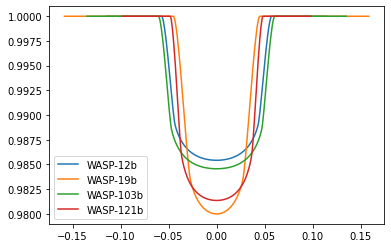

In [65]:
import ellc
import matplotlib.pyplot as plt
ldc_1 = [0.29, 0.34]

#simulate transit light curve of first four planets
for indx in def_pls.index[0:4]:
    r_1 = 1/def_pls["aR"][indx]
    r_2 = def_pls["Rp_Rs"][indx]/def_pls["aR"][indx]
    inc = def_pls["pl_orbincl"][indx]
    qmass = def_pls["Mp_Ms"][indx]

    phases = np.linspace(-3/24,3/24,6*60)/def_pls["pl_orbper"][indx]

    
    ellc_flux = ellc.lc(phases,t_zero=0, radius_1=r_1,radius_2=r_2,incl=inc,sbratio=0,
                      ld_1="quad",ldc_1=ldc_1,shape_1='sphere',shape_2='love',
                      q=qmass, hf_2= 1.5, grid_1="fine", grid_2="fine") 
    plt.plot(phases, ellc_flux, label = f"{def_pls['pl_name'][indx]}")
    plt.legend()

/home/tunde/miniconda3/envs/python3_env/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square


[3.037363193481991, 0.11783289174668882, 0.35068564250685]
[3.01812981 0.11253362 0.36343658]




/home/tunde/miniconda3/envs/python3_env/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square


[3.461703597059745, 0.14278281440860105, 0.6367850521000513]
[3.44617483 0.13651025 0.63957219]




/home/tunde/miniconda3/envs/python3_env/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square


[3.0113352438643277, 0.11970798274426843, 0.09458832584849874]
[2.99441238 0.11469131 0.13449166]




/home/tunde/miniconda3/envs/python3_env/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square


[3.755257991488526, 0.1314488392640427, 0.15725388331538365]
[3.73063945 0.12616476 0.190091  ]




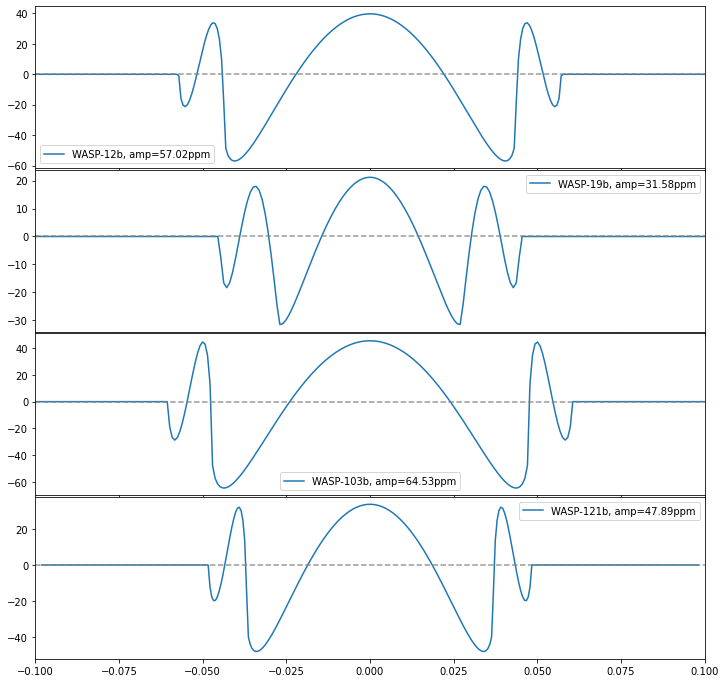

In [66]:
from scipy.optimize import minimize, least_squares, differential_evolution
from Planet_tools.convert_param import inclination, impact_parameter

def model(params,t,pl_shape="sphere",qmass=None,data=None):
    #params[a,rp,b,t0,q1,q2]
    r_1 = 1./params[0]                 #Rst/a
    r_2 = params[1]/params[0]          # Rp/a
    incl = inclination(params[2], params[0])     #inclination 
    #t0 = params[3]
    #u1,u2= kipping_to_quadLD(params[4],params[5])         #convert [q1,q2] back to [u1,u2]
    ldc_1 =[0.29,0.34] #[0.29, 0.34]
    ellc_flux = ellc.lc(t, t_zero=0, radius_1=r_1,radius_2=r_2,incl=incl,sbratio=0,ld_1="quad",
                    ldc_1=ldc_1,shape_1='sphere',shape_2=pl_shape, grid_1='fine',
                        grid_2='fine',q=qmass,hf_2=1.5)
    if data is None:
        return ellc_flux
    return np.sum((data - ellc_flux)**2)


fig, ax = plt.subplots(4,1, figsize=(12,12), sharex=True)
i=0
for indx in def_pls.index[0:4]:
    imp_par = impact_parameter(def_pls["pl_orbincl"][indx], def_pls["aR"][indx])
    params = [def_pls["aR"][indx], def_pls["Rp_Rs"][indx], imp_par ]
    
    phases = np.linspace(-3/24, 3/24, 6*60)/def_pls["pl_orbper"][indx]
    
    ellc_flux = model(params, phases, "love", def_pls["Mp_Ms"][indx] )
    
    #plt.plot(phases, ellc_flux, ".",label = f"{def_pls['pl_name'][indx]}")
    #plt.legend()
    result = differential_evolution(model,args=(phases,"sphere", def_pls["Mp_Ms"][indx] ,ellc_flux),
                                   bounds=((0.7*params[0], 1.5*params[0]),(0.7*params[1], 1.5*params[1]),
                                          (0, min(imp_par+0.2,1))))
    print(params)
    print(result.x)
    print("\n")
    
    sphr_fit = model(result.x,phases,"sphere",def_pls["Mp_Ms"][indx])
    
    ax[i].plot(phases, (ellc_flux-sphr_fit)*1e6, label=f"{def_pls['pl_name'][indx]}, amp={np.max(np.abs(1e6*(ellc_flux-sphr_fit))):.2f}ppm")
    ax[i].axhline(c="gray",ls="dashed", alpha=0.8)
    ax[i].legend()
    i += 1

    plt.xlim([-0.1,0.1])
plt.subplots_adjust(hspace=0.01)